In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf
stock_symbol = 'GOOGL'
df =yf.download(stock_symbol)
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2004-08-19    2.502503    2.604104    2.401401    2.511011    2.511011  \
2004-08-20    2.527778    2.729730    2.515015    2.710460    2.710460   
2004-08-23    2.771522    2.839840    2.728979    2.737738    2.737738   
2004-08-24    2.783784    2.792793    2.591842    2.624374    2.624374   
2004-08-25    2.626627    2.702703    2.599600    2.652653    2.652653   
...                ...         ...         ...         ...         ...   
2023-06-30  120.169998  121.080002  119.690002  119.699997  119.699997   
2023-07-03  119.239998  120.190002  118.820000  119.900002  119.900002   
2023-07-05  119.239998  122.610001  119.230003  121.750000  121.750000   
2023-07-06  119.800003  120.300003  118.400002  120.110001  120.110001   
2023-07-07  120.099998  121.050003  119.400

In [3]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044


In [4]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,2.502503,2.604104,2.401401,2.511011,893181924
1,2.527778,2.729730,2.515015,2.710460,456686856
2,2.771522,2.839840,2.728979,2.737738,365122512
3,2.783784,2.792793,2.591842,2.624374,304946748
4,2.626627,2.702703,2.599600,2.652653,183772044


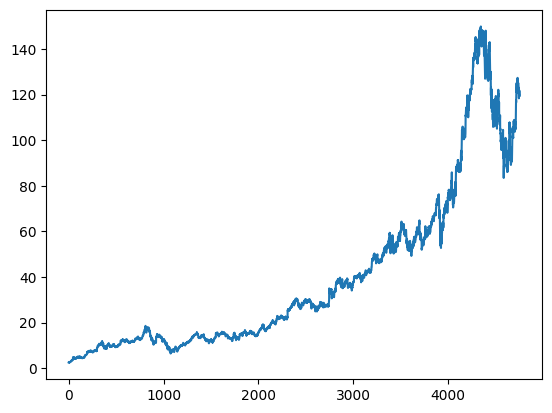

In [5]:
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close,Volume
0,2.502503,2.604104,2.401401,2.511011,893181924
1,2.527778,2.729730,2.515015,2.710460,456686856
2,2.771522,2.839840,2.728979,2.737738,365122512
3,2.783784,2.792793,2.591842,2.624374,304946748
4,2.626627,2.702703,2.599600,2.652653,183772044
...,...,...,...,...,...
4748,120.169998,121.080002,119.690002,119.699997,29519700
4749,119.239998,120.190002,118.820000,119.900002,14467900
4750,119.239998,122.610001,119.230003,121.750000,27584800
4751,119.800003,120.300003,118.400002,120.110001,24745200


In [10]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4748    108.0782
4749    108.2008
4750    108.4246
4751    108.6756
4752    108.9247
Name: Close, Length: 4753, dtype: float64

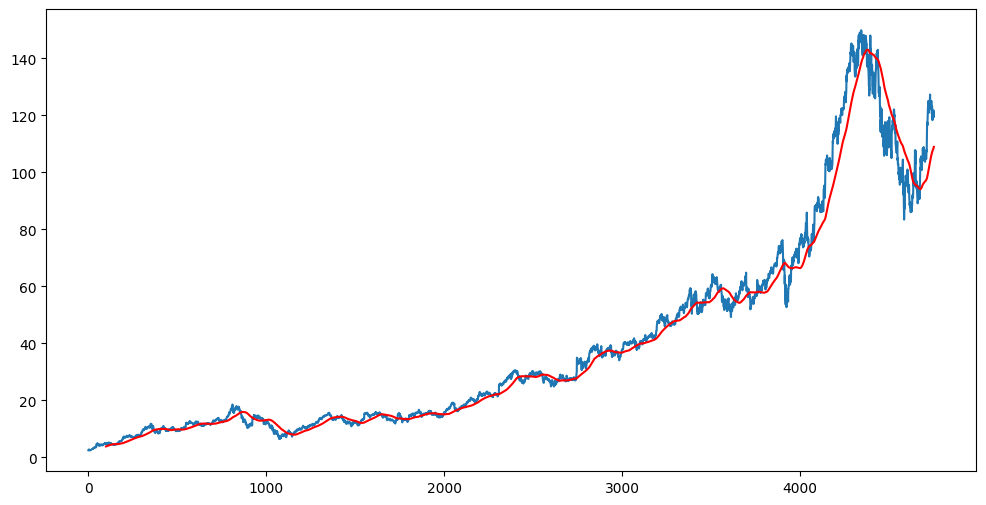

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=stock_data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4748    101.86755
4749    101.94205
4750    102.03625
4751    102.12280
4752    102.20485
Name: Close, Length: 4753, dtype: float64

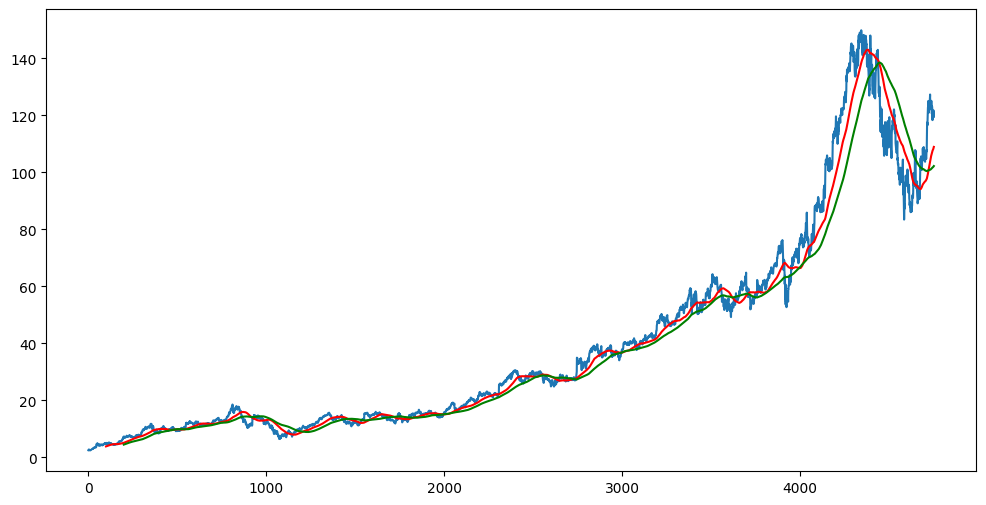

In [11]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(4753, 5)

In [13]:
#splitting data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3327, 1)
(1426, 1)


In [14]:
data_training.head()

,Close
0,2.511011
1,2.710460
2,2.737738
3,2.624374
4,2.652653


In [15]:
data_testing.head()

,Close
3327,52.499500
3328,52.133999
3329,52.619499
3330,52.914501
3331,52.386002


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.66335822e-04],
       [4.18378103e-03],
       [4.73323287e-03],
       ...,
       [9.89999181e-01],
       [9.99627411e-01],
       [1.00000000e+00]])

In [18]:
data_training_array.shape

(3327, 1)

In [18]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# ML Model

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
101/101 [==============================] - 42s 356ms/step - loss: 0.0189
Epoch 2/50
101/101 [==============================] - 36s 354ms/step - loss: 0.0055
Epoch 3/50
101/101 [==============================] - 35s 348ms/step - loss: 0.0047
Epoch 4/50
101/101 [==============================] - 35s 346ms/step - loss: 0.0046
Epoch 5/50
101/101 [==============================] - 36s 352ms/step - loss: 0.0042
Epoch 6/50
101/101 [==============================] - 35s 350ms/step - loss: 0.0039
Epoch 7/50
101/101 [==============================] - 35s 344ms/step - loss: 0.0038
Epoch 8/50
101/101 [==============================] - 35s 351ms/step - loss: 0.0030
Epoch 9/50
101/101 [==============================] - 36s 356ms/step - loss: 0.0036
Epoch 10/50
101/101 [==============================] - 35s 349ms/step - loss: 0.0029
Epoch 11/50
101/101 [==============================] - 35s 349ms/step - loss: 0.0029
Epoch 12/50
101/101 [==============================] - 35s 349ms/step - lo

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
3327,52.499500
3328,52.133999
3329,52.619499
3330,52.914501
3331,52.386002


In [26]:
data_training.tail(100)

,Close
3227,48.396500
3228,48.008999
3229,47.931000
3230,48.761002
3231,48.449501
...,...
3322,51.683498
3323,51.656502
3324,51.652000
3325,52.130001


In [28]:
past_100_days = data_training.tail(100)

In [35]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [36]:
final_df.head()

,Close
0,48.396500
1,48.008999
2,47.931000
3,48.761002
4,48.449501


In [37]:
input_data = scaler.fit_transform(final_df)

In [38]:
input_data

array([[0.02333306],
       [0.01960227],
       [0.0188513 ],
       ...,
       [0.72956852],
       [0.71377888],
       [0.70771337]])

In [39]:
input_data.shape

(1526, 1)

In [40]:
x_test = []
y_test= []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [41]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1426, 100, 1)
(1426,)


In [42]:
#making predictions

y_predicted = model.predict(x_test)

45/45 [==============================] - 5s 93ms/step


In [43]:
y_predicted.shape

(1426, 1)

In [44]:
y_test

array([0.06283608, 0.05931709, 0.06399141, ..., 0.72956852, 0.71377888,
       0.70771337])

In [45]:
y_predicted

array([[0.14331706],
       [0.14480732],
       [0.1463751 ],
       ...,
       [0.6964558 ],
       [0.6936302 ],
       [0.6913755 ]], dtype=float32)

In [46]:
scaler.scale_

array([0.00962784])

In [47]:
scale_factor = 1/0.00962784
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

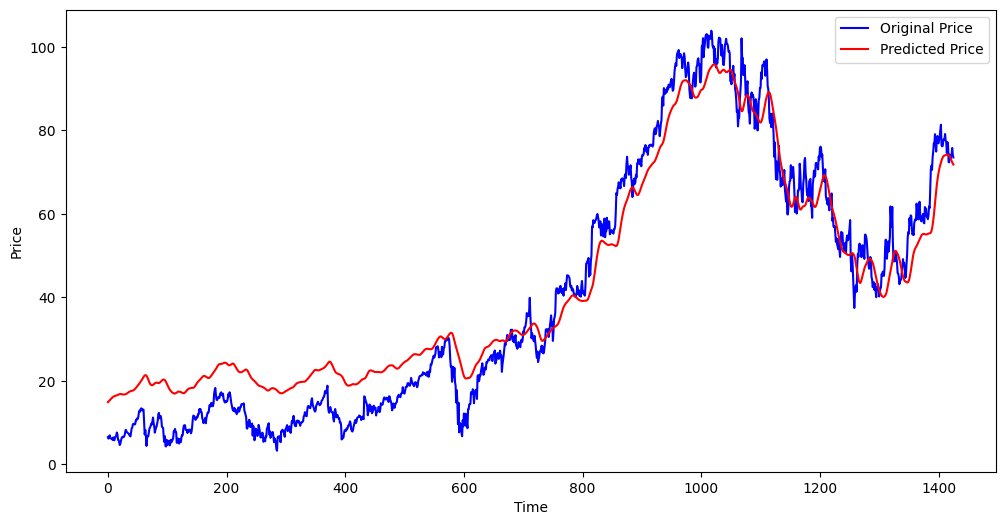

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r' ,label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()